In [19]:
!pip -q install yellowbrick==1.3

!pip -q install kneed
!pip -q install factor_analyzer
!pip -q install seaborn

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer
from yellowbrick.features import PCA as YBPCA
from kneed import KneeLocator
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
#import plotly.express as px

In [3]:
date_eng = pd.read_csv('../feature_engineering/seoulDate_dateEngin.csv')
date_eng

,Unnamed: 0,Unnamed: 0.1,datetime,date,hour,season,holiday,open,rent_count,temperature,...,solar_radiation,rainfall,snowfall,month,week,day_of_month,day_of_year,day_of_week,dayName_of_week,month_name
0,0,1,2017-12-01 00:00:00,2017-12-01,0,Winter,No Holiday,Yes,254,-5.2,...,0.0,0.0,0,12,48,1,335,4,Friday,Dec
1,1,2,2017-12-01 01:00:00,2017-12-01,1,Winter,No Holiday,Yes,204,-5.5,...,0.0,0.0,0,12,48,1,335,4,Friday,Dec
2,2,3,2017-12-01 02:00:00,2017-12-01,2,Winter,No Holiday,Yes,173,-6.0,...,0.0,0.0,0,12,48,1,335,4,Friday,Dec
3,3,4,2017-12-01 03:00:00,2017-12-01,3,Winter,No Holiday,Yes,107,-6.2,...,0.0,0.0,0,12,48,1,335,4,Friday,Dec
4,4,5,2017-12-01 04:00:00,2017-12-01,4,Winter,No Holiday,Yes,78,-6.0,...,0.0,0.0,0,12,48,1,335,4,Friday,Dec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,8755,8756,2018-11-30 19:00:00,2018-11-30,19,Autumn,No Holiday,Yes,1003,4.2,...,0.0,0.0,0,11,48,30,334,4,Friday,Nov
8756,8756,8757,2018-11-30 20:00:00,2018-11-30,20,Autumn,No Holiday,Yes,764,3.4,...,0.0,0.0,0,11,48,30,334,4,Friday,Nov
8757,8757,8758,2018-11-30 21:00:00,2018-11-30,21,Autumn,No Holiday,Yes,694,2.6,...,0.0,0.0,0,11,48,30,334,4,Friday,Nov
8758,8758,8759,2018-11-30 22:00:00,2018-11-30,22,Autumn,No Holiday,Yes,712,2.1,...,0.0,0.0,0,11,48,30,334,4,Friday,Nov


In [4]:
date_eng.describe()

,Unnamed: 0,Unnamed: 0.1,hour,rent_count,temperature,humidity,wind_speed,visibility,dewpoint_temp,solar_radiation,rainfall,snowfall,month,week,day_of_month,day_of_year,day_of_week
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,4379.500000,4380.500000,11.500000,704.602055,12.882922,58.226256,1.724909,14368.257991,4.073813,0.569111,0.148687,0.750685,6.526027,26.558904,15.720548,183.000000,3.002740
std,2528.938512,2528.938512,6.922582,644.997468,11.944825,20.362413,1.036300,6082.987120,13.060369,0.868746,1.128193,4.367462,3.448048,15.030690,8.796749,105.372043,1.998056
min,0.000000,1.000000,0.000000,0.000000,-17.800000,0.000000,0.000000,270.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2189.750000,2190.750000,5.750000,191.000000,3.500000,42.000000,0.900000,9400.000000,-4.700000,0.000000,0.000000,0.000000,4.000000,14.000000,8.000000,92.000000,1.000000
50%,4379.500000,4380.500000,11.500000,504.500000,13.700000,57.000000,1.500000,16980.000000,5.100000,0.010000,0.000000,0.000000,7.000000,27.000000,16.000000,183.000000,3.000000
75%,6569.250000,6570.250000,17.250000,1065.250000,22.500000,74.000000,2.300000,20000.000000,14.800000,0.930000,0.000000,0.000000,10.000000,40.000000,23.000000,274.000000,5.000000
max,8759.000000,8760.000000,23.000000,3556.000000,39.400000,98.000000,7.400000,20000.000000,27.200000,3.520000,35.000000,88.000000,12.000000,52.000000,31.000000,365.000000,6.000000


In [5]:
date_eng_colnames = list(date_eng.columns)
date_eng_colnames

['Unnamed: 0',
 'Unnamed: 0.1',
 'datetime',
 'date',
 'hour',
 'season',
 'holiday',
 'open',
 'rent_count',
 'temperature',
 'humidity',
 'wind_speed',
 'visibility',
 'dewpoint_temp',
 'solar_radiation',
 'rainfall',
 'snowfall',
 'month',
 'week',
 'day_of_month',
 'day_of_year',
 'day_of_week',
 'dayName_of_week',
 'month_name']

In [6]:
date_eng_num_colnames = list(date_eng.describe().columns)
date_eng_num_colnames

['Unnamed: 0',
 'Unnamed: 0.1',
 'hour',
 'rent_count',
 'temperature',
 'humidity',
 'wind_speed',
 'visibility',
 'dewpoint_temp',
 'solar_radiation',
 'rainfall',
 'snowfall',
 'month',
 'week',
 'day_of_month',
 'day_of_year',
 'day_of_week']

In [7]:
diff_names = []
for i in date_eng_colnames:
	if i not in date_eng_num_colnames:
		diff_names.append(i)
diff_names

['datetime',
 'date',
 'season',
 'holiday',
 'open',
 'dayName_of_week',
 'month_name']

In [44]:
date_eng2 = date_eng.copy()
date_eng2.drop(columns = diff_names,inplace=True)
date_eng2.drop(columns = ['rent_count'], inplace=True)
date_eng2.head()

,Unnamed: 0,Unnamed: 0.1,hour,temperature,humidity,wind_speed,visibility,dewpoint_temp,solar_radiation,rainfall,snowfall,month,week,day_of_month,day_of_year,day_of_week
0,0,1,0,-5.2,37,2.2,20000,-17.6,0.0,0.0,0,12,48,1,335,4
1,1,2,1,-5.5,38,0.8,20000,-17.6,0.0,0.0,0,12,48,1,335,4
2,2,3,2,-6.0,39,1.0,20000,-17.7,0.0,0.0,0,12,48,1,335,4
3,3,4,3,-6.2,40,0.9,20000,-17.6,0.0,0.0,0,12,48,1,335,4
4,4,5,4,-6.0,36,2.3,20000,-18.6,0.0,0.0,0,12,48,1,335,4


In [45]:
date_eng3 = date_eng2.iloc[: , 2:]
date_eng3.head()

,hour,temperature,humidity,wind_speed,visibility,dewpoint_temp,solar_radiation,rainfall,snowfall,month,week,day_of_month,day_of_year,day_of_week
0,0,-5.2,37,2.2,20000,-17.6,0.0,0.0,0,12,48,1,335,4
1,1,-5.5,38,0.8,20000,-17.6,0.0,0.0,0,12,48,1,335,4
2,2,-6.0,39,1.0,20000,-17.7,0.0,0.0,0,12,48,1,335,4
3,3,-6.2,40,0.9,20000,-17.6,0.0,0.0,0,12,48,1,335,4
4,4,-6.0,36,2.3,20000,-18.6,0.0,0.0,0,12,48,1,335,4


In [46]:
date_eng3.describe()

,hour,temperature,humidity,wind_speed,visibility,dewpoint_temp,solar_radiation,rainfall,snowfall,month,week,day_of_month,day_of_year,day_of_week
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,11.500000,12.882922,58.226256,1.724909,14368.257991,4.073813,0.569111,0.148687,0.750685,6.526027,26.558904,15.720548,183.000000,3.002740
std,6.922582,11.944825,20.362413,1.036300,6082.987120,13.060369,0.868746,1.128193,4.367462,3.448048,15.030690,8.796749,105.372043,1.998056
min,0.000000,-17.800000,0.000000,0.000000,270.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,5.750000,3.500000,42.000000,0.900000,9400.000000,-4.700000,0.000000,0.000000,0.000000,4.000000,14.000000,8.000000,92.000000,1.000000
50%,11.500000,13.700000,57.000000,1.500000,16980.000000,5.100000,0.010000,0.000000,0.000000,7.000000,27.000000,16.000000,183.000000,3.000000
75%,17.250000,22.500000,74.000000,2.300000,20000.000000,14.800000,0.930000,0.000000,0.000000,10.000000,40.000000,23.000000,274.000000,5.000000
max,23.000000,39.400000,98.000000,7.400000,20000.000000,27.200000,3.520000,35.000000,88.000000,12.000000,52.000000,31.000000,365.000000,6.000000


In [47]:
_ , p_value = calculate_bartlett_sphericity(date_eng3)
p_value

0.0

In [48]:
_, kmo_score = calculate_kmo(date_eng3)
kmo_score 

0.4248502916029618

In [49]:
colnames = list(date_eng3.columns)

scaler = StandardScaler(with_mean=True,with_std=True)
scaled_features = pd.DataFrame(scaler.fit_transform(date_eng3))

scaled_features.columns = colnames

In [50]:
corr = scaled_features.corr()
corr

,hour,temperature,humidity,wind_speed,visibility,dewpoint_temp,solar_radiation,rainfall,snowfall,month,week,day_of_month,day_of_year,day_of_week
hour,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,-5.627158e-18,3.548658e-19,-3.193792e-18,-9.378596e-18,-4.587908e-18
temperature,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,2.161826e-01,2.145709e-01,1.564544e-02,2.131873e-01,-3.367631e-03
humidity,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,1.398748e-01,1.358131e-01,-2.904392e-02,1.353709e-01,-7.619862e-03
wind_speed,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-1.567102e-01,-1.582577e-01,-3.197744e-02,-1.584181e-01,-2.143759e-02
visibility,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,6.487420e-02,5.763830e-02,-1.017585e-01,5.691708e-02,-2.619092e-02
dewpoint_temp,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,2.425519e-01,2.395772e-01,1.525311e-04,2.380685e-01,-1.378257e-02
solar_radiation,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,-3.159544e-02,-3.255385e-02,-2.981839e-03,-3.264355e-02,1.058026e-02
rainfall,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,1.195810e-02,1.184755e-02,-1.623338e-03,1.142009e-02,-1.777046e-02
snowfall,-2.151645e-02,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,5.312091e-02,6.212188e-02,1.020774e-01,6.235405e-02,-1.167029e-02
month,-5.627158e-18,0.216183,0.139875,-0.156710,0.064874,0.242552,-0.031595,0.011958,0.053121,1.000000e+00,9.963077e-01,1.189318e-02,9.965042e-01,2.126758e-02


<AxesSubplot:>

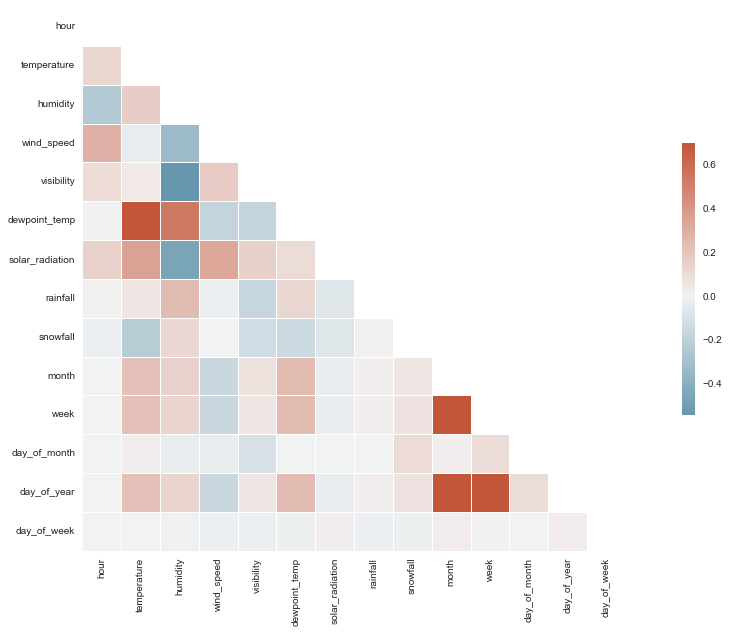

In [51]:
plt.subplots(figsize=(20, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,cmap=cmap,vmax =0.7, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [53]:

N = scaled_features.columns.size
pca = PCA(n_components=N)
pca.fit(scaled_features)




PCA(n_components=14)

In [54]:
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([2.42101985e-01, 1.58741029e-01, 1.39163728e-01, 8.37875790e-02,
       7.39005204e-02, 7.14706551e-02, 6.29135656e-02, 5.94546916e-02,
       5.06665580e-02, 4.29868163e-02, 1.44881818e-02, 3.22954105e-04,
       1.63727290e-06, 9.83082856e-08])

In [55]:
cumulative_variance = np.cumsum(np.round(explained_variance_ratio, decimals=3))
cumulative_variance

array([0.242, 0.401, 0.54 , 0.624, 0.698, 0.769, 0.832, 0.891, 0.942,
       0.985, 0.999, 0.999, 0.999, 0.999])

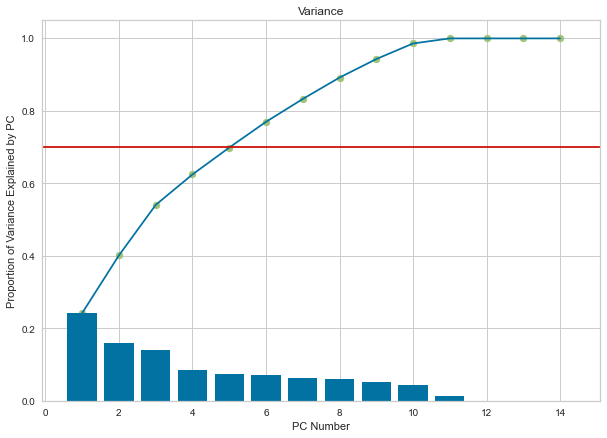

In [56]:
x = list(range(1,N+1))
plt.figure(figsize=(10, 7)) 
plt.bar(x,explained_variance_ratio)
plt.scatter(range(1,N+1),cumulative_variance)
plt.plot(x,cumulative_variance)
plt.title('Variance')
plt.xlabel('PC Number')
plt.ylabel('Proportion of Variance Explained by PC')
plt.axhline(y=0.7, color = 'r')

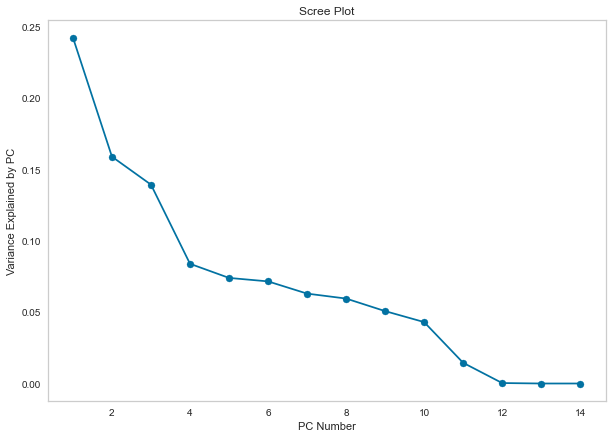

In [57]:
plt.figure(figsize=(10, 7)) 
plt.scatter(range(1,N+1),pca.explained_variance_ratio_)
plt.plot(range(1,N+1),pca.explained_variance_ratio_)
plt.title('Scree Plot')
plt.xlabel('PC Number')
plt.ylabel('Variance Explained by PC')
plt.grid()

In [58]:
kl = KneeLocator(range(1, N+1), pca.explained_variance_ratio_, curve="convex", direction="decreasing")

kl.elbow

4

In [59]:
# factor analysis
def evaluate_pcs(num_of_pcs,data):
    def encode_vals(x): #helper functions to suppress loading less than 0.7 
    #a gradual process to lead to this function
    # if x<=-0.5, we drop the variable
        if x <= -0.5 or x >= 0.5: #Adjust the threshold value 
            return x
        else:
            return("")    
    f = FactorAnalyzer(n_factors=num_of_pcs, method = 'principal',rotation='varimax') #Conduct PCA + varimax rotation to extract latent factors 
    f.fit(data)
    loadings = pd.DataFrame(f.loadings_).set_index(data.columns)
    loadings = loadings.applymap(encode_vals)
    loadingcols= list(loadings.columns)
    newcols = {}
    for i in loadingcols:
        newcols[i] = "PC" + str(i+1)
    loadings.rename(columns = newcols,inplace=True)
    return loadings



In [60]:
def CronbachAlpha(itemscores): #calculate the CronbachAlpha to see how closely related a set of items are as a group
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=0, ddof=1)
    tscores = itemscores.sum(axis=1)
    nitems = itemscores.shape[1]
    return (nitems / (nitems-1)) * (1 - (itemvars.sum() / tscores.var(ddof=1)))

In [63]:
evaluate_pcs(3,scaled_features[colnames])

,PC1,PC2,PC3
hour,,,
temperature,,,0.95366
humidity,,-0.880941,
wind_speed,,0.56973,
visibility,,0.660302,
dewpoint_temp,,,0.884039
solar_radiation,,0.5911,
rainfall,,,
snowfall,,,
month,0.983739,,


In [65]:
"""
# 4 PCs
print(CronbachAlpha(scaled_features[['month','week','day_of_year']]))
print(CronbachAlpha(scaled_features[['temperature','dewpoint_temp']]))
print(CronbachAlpha(scaled_features[['hour','wind_speed','solar_radiation']]))
"""

# 3 PCs

print(CronbachAlpha(scaled_features[['month','week','day_of_year']]))
print(CronbachAlpha(scaled_features[['wind_speed','visibility','solar_radiation']]))
print(CronbachAlpha(scaled_features[['temperature','dewpoint_temp']]))



0.9991795502136992
0.45519864302093754
0.9544114060820124


In [53]:
date_eng21 = pd.read_csv('ft_eng2.csv')
date_eng21.describe()
date_eng21_colnames = list(date_eng21.columns)
date_eng21_num_colnames = list(date_eng21.describe().columns)
diff_names2 = []
for i in date_eng21_colnames:
	if i not in date_eng21_num_colnames:
		diff_names2.append(i)

date_eng22 = date_eng21.copy()
date_eng22.drop(columns = diff_names2,inplace=True)

date_eng23 = date_eng22.iloc[: , 3:]

_ , p_value = calculate_bartlett_sphericity(date_eng23)

,Unnamed: 0,X1,Unnamed: 0.1,datetime,date,hour,season,holiday,open,rent_count,...,rainfall,snowfall,month,week,day_of_month,day_of_year,day_of_week,dayName_of_week,month_name,season_no
0,1,0,1,2017-12-01 00:00:00,2017-12-01,0,Winter,No Holiday,Yes,254,...,0.0,0,12,48,1,335,4,Friday,Dec,4
1,2,1,2,2017-12-01 01:00:00,2017-12-01,1,Winter,No Holiday,Yes,204,...,0.0,0,12,48,1,335,4,Friday,Dec,4
2,3,2,3,2017-12-01 02:00:00,2017-12-01,2,Winter,No Holiday,Yes,173,...,0.0,0,12,48,1,335,4,Friday,Dec,4
3,4,3,4,2017-12-01 03:00:00,2017-12-01,3,Winter,No Holiday,Yes,107,...,0.0,0,12,48,1,335,4,Friday,Dec,4
4,5,4,5,2017-12-01 04:00:00,2017-12-01,4,Winter,No Holiday,Yes,78,...,0.0,0,12,48,1,335,4,Friday,Dec,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,8756,8755,8756,2018-11-30 19:00:00,2018-11-30,19,Autumn,No Holiday,Yes,1003,...,0.0,0,11,48,30,334,4,Friday,Nov,3
8756,8757,8756,8757,2018-11-30 20:00:00,2018-11-30,20,Autumn,No Holiday,Yes,764,...,0.0,0,11,48,30,334,4,Friday,Nov,3
8757,8758,8757,8758,2018-11-30 21:00:00,2018-11-30,21,Autumn,No Holiday,Yes,694,...,0.0,0,11,48,30,334,4,Friday,Nov,3
8758,8759,8758,8759,2018-11-30 22:00:00,2018-11-30,22,Autumn,No Holiday,Yes,712,...,0.0,0,11,48,30,334,4,Friday,Nov,3


In [60]:
_, kmo_score = calculate_kmo(date_eng23)
kmo_score 

0.3758310591819197